In [119]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ipl-data-set/matches.csv
/kaggle/input/ipl-data-set/teamwise_home_and_away.csv
/kaggle/input/ipl-data-set/deliveries.csv
/kaggle/input/ipl-data-set/most_runs_average_strikerate.csv
/kaggle/input/ipl-data-set/teams.csv
/kaggle/input/ipl-data-set/Players.xlsx


In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [121]:
match = pd.read_csv('../input/ipl-data-set/matches.csv')
ball = pd.read_csv('../input/ipl-data-set/deliveries.csv')

# 1. Checking the DATA

In [4]:
ball.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# 2. Fixing and Cleaning The Data

In [122]:
x=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

match.replace(x,y,inplace = True)
ball.replace(x,y,inplace = True)



In [7]:
match.drop(['umpire3'], axis= 1, inplace = True)

In [8]:
match.isna().sum()

id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [9]:
total_score_df = ball.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [10]:
match_df = match.merge(total_score_df[['match_id', 'total_runs']], left_on='id', right_on='match_id')
match_df[match_df['dl_applied'] == 0]
match_df.drop(['dl_applied'], axis = 1, inplace = True)

In [11]:
match_df = match_df[['match_id', 'city', 'winner', 'total_runs']]
match_df = match_df.rename(columns = {'total_runs':'target'})
match_df

,match_id,city,winner,target
0,1,Hyderabad,SRH,207
1,2,Pune,RPS,184
2,3,Rajkot,KKR,183
3,4,Indore,KXIP,163
4,5,Bangalore,RCB,157
...,...,...,...,...
751,11347,Mumbai,MI,143
752,11412,Chennai,MI,136
753,11413,Visakhapatnam,DC,171
754,11414,Visakhapatnam,CSK,155


In [12]:
delivery_df = match_df.merge(ball, on='match_id')

In [13]:
delivery_df

,match_id,city,winner,target,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,SRH,207,1,SRH,RCB,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,SRH,207,1,SRH,RCB,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,SRH,207,1,SRH,RCB,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,SRH,207,1,SRH,RCB,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,SRH,207,1,SRH,RCB,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,Hyderabad,MI,152,2,CSK,MI,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,Hyderabad,MI,152,2,CSK,MI,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,Hyderabad,MI,152,2,CSK,MI,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,Hyderabad,MI,152,2,CSK,MI,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


# 3. Feature Selection and engineering 

In [14]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [15]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs']
delivery_df['runs_left'] = delivery_df['target'] - delivery_df['current_score']
delivery_df['balls_left'] = 120+6 - (delivery_df['over'] * 6 + delivery_df['ball'])


In [16]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna('0')
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == '0' else '1')
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,target,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,SRH,207,2,RCB,SRH,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,SRH,207,2,RCB,SRH,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,SRH,207,2,RCB,SRH,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,SRH,207,2,RCB,SRH,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,SRH,207,2,RCB,SRH,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [17]:
delivery_df['crr'] = (delivery_df['current_score']) / (120 - delivery_df['balls_left']) *6
delivery_df['rrr'] = (delivery_df['runs_left'] ) / delivery_df['balls_left'] *6

In [18]:
delivery_df['result'] = np.where(delivery_df['batting_team'] == delivery_df['winner'],1,0 )

In [19]:
final_df = delivery_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'target', 'crr', 'rrr', 'result']]
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target,crr,rrr,result
125,RCB,SRH,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,RCB,SRH,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,RCB,SRH,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,RCB,SRH,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,RCB,SRH,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
179073,CSK,MI,Hyderabad,0,4,5,152,7.862069,0.000000,0
179074,CSK,MI,Hyderabad,-2,3,5,152,7.897436,-4.000000,0
179075,CSK,MI,Hyderabad,-3,2,4,152,7.881356,-9.000000,0
179076,CSK,MI,Hyderabad,-5,1,4,152,7.915966,-30.000000,0


# 5. Beginnning of ML Process

In [20]:
final_df = final_df[final_df['balls_left'] != 0]
final_df.dropna(inplace=True)

X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [21]:
X = pd.get_dummies(X, drop_first = True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [23]:
logreg = LogisticRegression()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
svm = SVC()

# 6. Model Selection

In [24]:
from sklearn.metrics import f1_score
from sklearn import metrics

models = [logreg,rfc,dtc,svm]
models_name = ['Logistic Regression','Random Forest', 'Decision Tree', 'SVM']
model_y = [[]] * len(models)


for idx, i in enumerate(models):
    i.fit(X_train, y_train)
    model_y[idx] = i.predict(X_test)
    print(models_name[idx],' Model Completed')
    
#SVM takes a lot lot of time to finish 

Logistic Regression  Model Completed
Random Forest  Model Completed
Decision Tree  Model Completed
SVM  Model Completed


In [25]:
for idx, i in enumerate(models):
    print('{}'.format(models_name[idx]),':')
    print('-'*20)
    print('Accuracy Score: {}%'.format(i.score(X_test,y_test)))
    print('Precision: {}'.format( metrics.precision_score(model_y[idx],y_test)))
    print('Recall:{}'.format( metrics.recall_score(model_y[idx],y_test)))
    print('F1 Score: {}'.format( f1_score(model_y[idx],y_test)))
    print('-'*20)
    print('\n'*2)



Logistic Regression :
--------------------
Accuracy Score: 0.7960058737151248%
Precision: 0.8234655078761542
Recall:0.8039881204921511
F1 Score: 0.8136102613642462
--------------------



Random Forest :
--------------------
Accuracy Score: 0.9987077826725403%
Precision: 0.9989136338946225
Recall:0.9986966438579342
F1 Score: 0.9988051270910275
--------------------



Decision Tree :
--------------------
Accuracy Score: 0.9908957415565345%
Precision: 0.9909831613253667
Recall:0.9921688057428758
F1 Score: 0.9915756291102777
--------------------



SVM :
--------------------
Accuracy Score: 0.7729221732745962%
Precision: 0.8107550244432373
Recall:0.7784499843538124
F1 Score: 0.794274159216688
--------------------





# 7. Use Case of the Model

In [112]:
def win_prob_calc(match_data, match_id, model):
    """
    At every delivery, the model will calculate the probability
    for the chasing team.
    """

    bat_team = match_data[match_data['match_id'] == match_id ]['batting_team'].iloc[0]
    bowl_team = match_data[match_data['match_id'] == match_id ]['bowling_team'].iloc[0]
            ## Match between teams
    print(f"Match: { bat_team} vs {bowl_team}")
    
#      get all the required columns in a copy dataframe
    match_data = match_data[['match_id','ball','batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',\
                     'wickets', 'target', 'crr', 'rrr']].dropna()

    match_data = pd.get_dummies(match_data, drop_first = True)
    match = match_data[match_data['match_id'] == match_id]
    
    
    # converting ball by ball data to over by over data
    match = match[(match['ball'] == 6)]
    

    copy_df = match.drop(['match_id','ball'],axis = 1)

    # get rows where balls left are not zero - avoiding division by zero error
    copy_df = copy_df[copy_df['balls_left'] != 0]
    
    # calculate probability using the model
    result = model.predict_proba(copy_df)
    
    ## calculating percentage chance(prob multiplied by 100) for each team
    copy_df['lose'] = np.round(result.T[0]*100,1)
    copy_df['win'] = np.round(result.T[1]*100,1)
    
    # end of over 
    copy_df['end_of_over'] = range(1, copy_df.shape[0]+1)
    
    
    target = copy_df['target'].values[0]
    print("Target:", target)
    
    # calculate runs left
    runs = list(copy_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0, target)
    
    copy_df['runs_in_over'] = np.array(runs)[:-1] - np.array(new_runs)
    
    wickets = list(copy_df['wickets'].values)
    
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    
    # 
    w = np.array(wickets)
    nw = np.array(new_wickets)
    
    copy_df['wickets_in_over'] = (nw - w)[0:copy_df.shape[0]]
    
    copy_df = copy_df[['end_of_over','runs_in_over','wickets_in_over','lose','win']]
       # chasing team win probability
    print(f"Win probability for {bat_team}")
    
    return copy_df, target


In [117]:
temp_df, target = win_prob_calc(delivery_df, 10, logreg)
temp_df

Match: MI vs SRH
Target: 158
Win probability for MI


,end_of_over,runs_in_over,wickets_in_over,lose,win
2247,1,6,0,24.4,75.6
2253,2,15,0,13.2,86.8
2259,3,7,0,12.2,87.8
2265,4,11,1,15.5,84.5
2271,5,3,1,28.5,71.5
2277,6,19,0,14.5,85.5
2283,7,3,0,16.0,84.0
2289,8,9,0,13.0,87.0
2295,9,3,0,14.2,85.8
2301,10,9,1,19.7,80.3


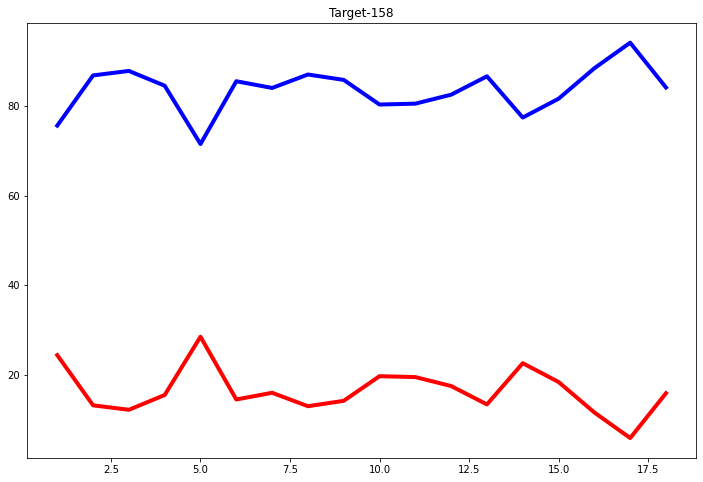

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.plot(temp_df['end_of_over'],temp_df['win'],color='blue',linewidth=4)

plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)

plt.title('Target-' + str(target));